# Just-in-time Compilation with [Numba](http://numba.pydata.org/) 

## Numba is a JIT compiler which translates Python code in native machine language

* Using special decorators on Python functions Numba compiles them on the fly to machine code using LLVM
* Numba is compatible with Numpy arrays which are the basis of many scientific packages in Python
* It enables parallelization of machine code so that all the CPU cores are used

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numba

### Create a new [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html)

In [2]:
rng = np.random.default_rng()

## Using `numba.jit`

Numba offers `jit` which can used to decorate Python functions.

In [3]:
def is_prime(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(1, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [4]:
n = rng.integers(2, 10000000) # Get a random integer between 2 and 10000000
print(n, is_prime(n))

5925961 True


In [5]:
#is_prime(1)

In [6]:
@numba.jit
def is_prime_jitted(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(1, n_sqrt):
            if n % i == 0:
                return False

    return True

/tmp/ipykernel_12129/548429467.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def is_prime_jitted(n):


In [7]:
numbers = rng.integers(2, 100000, size=10000)
%time p1 = [is_prime(n) for n in numbers]
%time p2 = [is_prime_jitted(n) for n in numbers]

CPU times: user 30.7 ms, sys: 0 ns, total: 30.7 ms
Wall time: 30.2 ms


/tmp/ipykernel_12129/548429467.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "is_prime_jitted" failed type inference due to: No implementation of function Function(<built-in function mod>) found for signature:
 
 >>> mod(Literal[str]("%s" <= 1), int64)
 
There are 6 candidate implementations:
  - Of which 4 did not match due to:
  Overload of function 'mod': File: <numerous>: Line N/A.
    With argument(s): '(unicode_type, int64)':
   No match.
  - Of which 2 did not match due to:
  Operator Overload in function 'mod': File: unknown: Line unknown.
    With argument(s): '(unicode_type, int64)':
   No match for registered cases:
    * (int64, int64) -> int64
    * (int64, uint64) -> int64
    * (uint64, int64) -> int64
    * (uint64, uint64) -> uint64
    * (float32, float32) -> float32
    * (float64, float64) -> float64

During: typing of intrinsic-call at /tmp/ipykernel_12129/548429467.py (4)

File "../../../../../tmp/ipykern

NumbaNotImplementedError: Failed in object mode pipeline (step: object mode frontend)
Failed in object mode pipeline (step: object mode backend)
<class 'numba.core.ir.DynamicRaise'>, <dynamic> raise <class 'ArithmeticError'>(Var($16binary_modulo.3, 548429467.py:4))
During: lowering "<dynamic> raise <class 'ArithmeticError'>(Var($16binary_modulo.3, 548429467.py:4))" at /tmp/ipykernel_12129/548429467.py (4)

## Using `numba.jit` with `nopython=True`

In [8]:
@numba.jit(nopython=True)
def is_prime_njitted(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(1, n_sqrt):
            if n % i == 0:
                return False

    return True

In [9]:
numbers = rng.integers(2, 100000, size=10000)
%time p1 = [is_prime_jitted(n) for n in numbers]
%time p2 = [is_prime_njitted(n) for n in numbers]

NumbaNotImplementedError: Failed in object mode pipeline (step: object mode frontend)
Failed in object mode pipeline (step: object mode backend)
<class 'numba.core.ir.DynamicRaise'>, <dynamic> raise <class 'ArithmeticError'>(Var($16binary_modulo.3, 548429467.py:4))
During: lowering "<dynamic> raise <class 'ArithmeticError'>(Var($16binary_modulo.3, 548429467.py:4))" at /tmp/ipykernel_12129/548429467.py (4)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function mod>) found for signature:
 
 >>> mod(Literal[str]("%s" <= 1), int64)
 
There are 6 candidate implementations:
    - Of which 4 did not match due to:
    Overload of function 'mod': File: <numerous>: Line N/A.
      With argument(s): '(unicode_type, int64)':
     No match.
    - Of which 2 did not match due to:
    Operator Overload in function 'mod': File: unknown: Line unknown.
      With argument(s): '(unicode_type, int64)':
     No match for registered cases:
      * (int64, int64) -> int64
      * (int64, uint64) -> int64
      * (uint64, int64) -> int64
      * (uint64, uint64) -> uint64
      * (float32, float32) -> float32
      * (float64, float64) -> float64

During: typing of intrinsic-call at /tmp/ipykernel_12129/3640876976.py (4)

File "../../../../../tmp/ipykernel_12129/3640876976.py", line 4:
<source missing, REPL/exec in use?>


## Using ` @numba.jit(nopython=True)` is equivalent to using ` @numba.njit`

In [10]:
@numba.njit
def is_prime_njitted(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(1, n_sqrt):
            if n % i == 0:
                return False

    return True

In [11]:
numbers = rng.integers(2, 100000, size=10000)
%time p = [is_prime_jitted(n) for n in numbers]
%time p = [is_prime_njitted(n) for n in numbers]

NumbaNotImplementedError: Failed in object mode pipeline (step: object mode frontend)
Failed in object mode pipeline (step: object mode backend)
<class 'numba.core.ir.DynamicRaise'>, <dynamic> raise <class 'ArithmeticError'>(Var($16binary_modulo.3, 548429467.py:4))
During: lowering "<dynamic> raise <class 'ArithmeticError'>(Var($16binary_modulo.3, 548429467.py:4))" at /tmp/ipykernel_12129/548429467.py (4)

CPU times: user 115 ms, sys: 0 ns, total: 115 ms
Wall time: 163 ms


## Use `cache=True` to cache the compiled function

In [12]:
import math
from numba import njit

@njit(cache=True)
def is_prime_njitted_cached(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(1, n_sqrt):
            if n % i == 0:
                return False

    return True

In [13]:
numbers = rng.integers(2, 100000, size=10000)
%time p = [is_prime_njitted(n) for n in numbers]
%time p = [is_prime_njitted_cached(n) for n in numbers]

CPU times: user 4.11 ms, sys: 7 µs, total: 4.11 ms
Wall time: 4.12 ms
CPU times: user 113 ms, sys: 1.61 ms, total: 114 ms
Wall time: 200 ms


## Vector Triad Benchmark Python vs Numpy vs Numba

In [14]:
from timeit import default_timer as timer

def vecTriad(a, b, c, d):
    for j in range(a.shape[0]):
        a[j] = b[j] + c[j] * d[j]
              
def vecTriadNumpy(a, b, c, d):
    a[:] = b + c * d

@numba.njit()
def vecTriadNumba(a, b, c, d):
    for j in range(a.shape[0]):
        a[j] = b[j] + c[j] * d[j]

        
# Initialize Vectors
n = 10000 # Vector size
r = 100 # Iterations
a = np.zeros(n, dtype=np.float64)
b = np.empty_like(a)
b[:] = 1.0
c = np.empty_like(a)
c[:] = 1.0
d = np.empty_like(a)
d[:] = 1.0


# Python version
start = timer()

for i in range(r):
    vecTriad(a, b, c, d)
        
end = timer()
mflops = 2.0 * r * n / ((end - start) * 1.0e6) 
print(f'Python: Mflops/sec: {mflops}')


# Numpy version
start = timer()

for i in range(r):
    vecTriadNumpy(a, b, c, d)
        
end = timer()
mflops = 2.0 * r * n / ((end - start) * 1.0e6) 
print(f'Numpy: Mflops/sec: {mflops}')


# Numba version
vecTriadNumba(a, b, c, d) # Run once to avoid measuring the compilation overhead

start = timer()

for i in range(r):
    vecTriadNumba(a, b, c, d)
        
end = timer()
mflops = 2.0 * r * n / ((end - start) * 1.0e6) 
print(f'Numba: Mflops/sec: {mflops}')

Python: Mflops/sec: 5.214584504057698
Numpy: Mflops/sec: 783.9844888537366
Numba: Mflops/sec: 1818.8185830046095


## Eager compilation using function signatures

In [15]:
import math
from numba import njit

@njit(['boolean(int64)', 'boolean(int32)'])
def is_prime_njitted_eager(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(1, n_sqrt):
            if n % i == 0:
                return False

    return True

In [16]:
numbers = rng.integers(2, 1000000, size=1000)

# Run twice aft
%time p1 = [is_prime_njitted_eager(n) for n in numbers]
%time p2 = [is_prime_njitted_eager(n) for n in numbers]

CPU times: user 544 µs, sys: 42 µs, total: 586 µs
Wall time: 591 µs
CPU times: user 351 µs, sys: 214 µs, total: 565 µs
Wall time: 570 µs


In [17]:
p1 = [is_prime_njitted_eager(n) for n in numbers.astype(np.int32)]
#p2 = [is_prime_njitted_eager(n) for n in numbers.astype(np.float64)]

## Calculating and plotting the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

In [18]:
X, Y = np.meshgrid(np.linspace(-2.0, 1, 1000), np.linspace(-1.0, 1.0, 1000))

def mandelbrot(X, Y, itermax):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = 0.0
            y = 0.0
            while x * x + y * y < 4.0 and it < itermax:
                x, y = x * x - y * y + cx, 2.0 * x * y + cy
                it += 1
            mandel[i, j] = it
            
    return mandel

CPU times: user 17.5 s, sys: 0 ns, total: 17.5 s
Wall time: 17.5 s


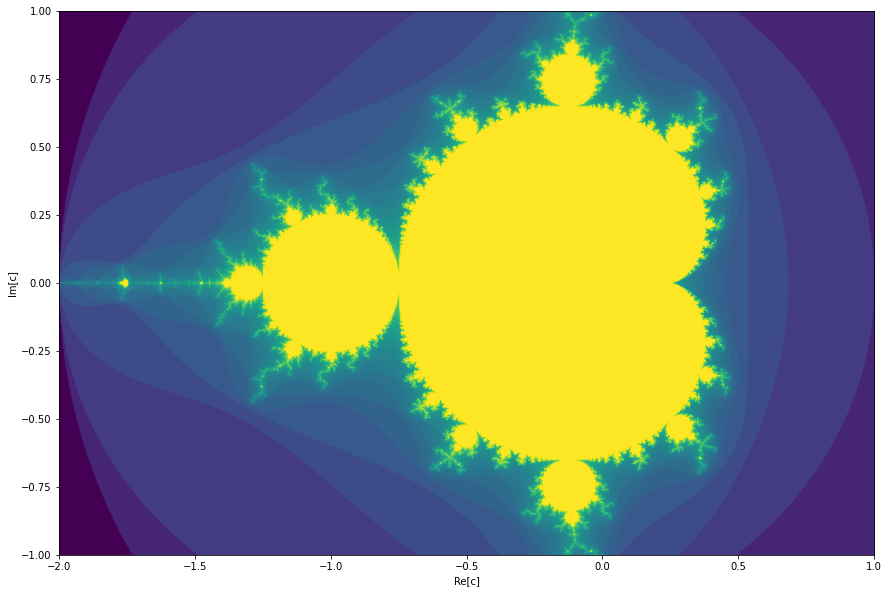

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

%time m = mandelbrot(X, Y, 100)
    
ax.imshow(np.log(1 + m), extent=[-2.0, 1, -1.0, 1.0]);
ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]');

In [20]:
@numba.njit(parallel=True)
def mandelbrot_jitted(X, Y, radius2, itermax):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in numba.prange(X.shape[0]):
        for j in range(X.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = cx
            y = cy
            while x * x + y * y < 4.0 and it < itermax:
                x, y = x * x - y * y + cx, 2.0 * x * y + cy
                it += 1
            mandel[i, j] = it
            
    return mandel

CPU times: user 708 ms, sys: 439 µs, total: 708 ms
Wall time: 1.21 s


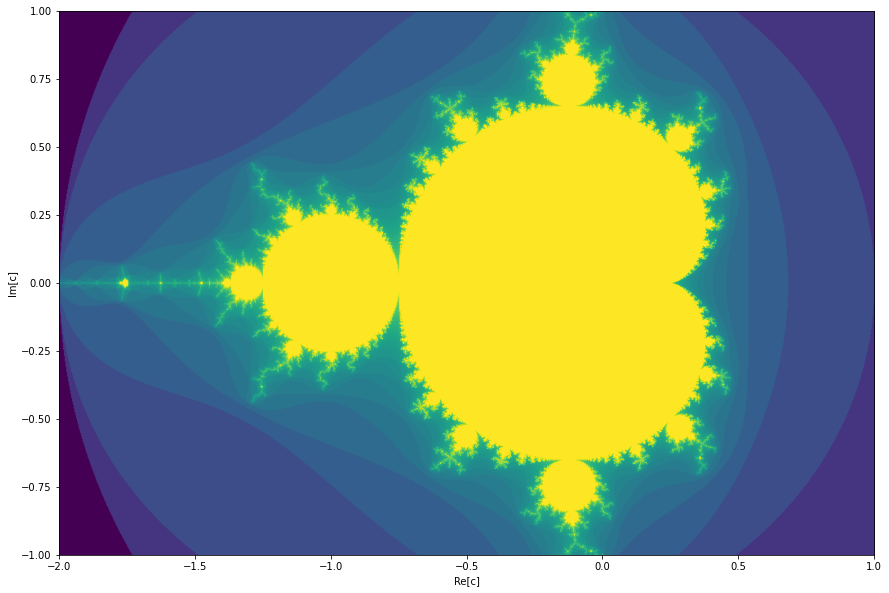

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)


%time m = mandelbrot_jitted(X, Y, 4.0, 100)
    
ax.imshow(np.log(1 + m), extent=[-2.0, 1, -1.0, 1.0]);
ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]');

### Getting parallelization information

In [22]:
mandelbrot_jitted.parallel_diagnostics(level=3)

 
 Parallel Accelerator Optimizing:  Function mandelbrot_jitted, 
/tmp/ipykernel_12129/2504093024.py (1)  


Parallel loop listing for  Function mandelbrot_jitted, /tmp/ipykernel_12129/2504093024.py (1) 
---------------------------------------------------------------|loop #ID
@numba.njit(parallel=True)                                     | 
def mandelbrot_jitted(X, Y, radius2, itermax):                 | 
    mandel = np.empty(shape=X.shape, dtype=np.int32)           | 
    for i in numba.prange(X.shape[0]):-------------------------| #0
        for j in range(X.shape[1]):                            | 
            it = 0                                             | 
            cx = X[i, j]                                       | 
            cy = Y[i, j]                                       | 
            x = cx                                             | 
            y = cy                                             | 
            while x * x + y * y < 4.0 and it < itermax:      

## Creating `ufuncs` using `numba.vectorize`

In [ ]:
from math import sin
from numba import float64, int64

def my_numpy_sin(a, b):
    return np.sin(a) + np.sin(b)

@np.vectorize
def my_sin(a, b):
    return sin(a) + sin(b)

@numba.vectorize([float64(float64, float64), int64(int64, int64)], target='parallel')
def my_sin_numba(a, b):
    return np.sin(a) + np.sin(b)

In [ ]:
x = rng.integers(0, 100, size=9000000)
y = rng.integers(0, 100, size=9000000)

%time _ = my_numpy_sin(x, y)
%time _ = my_sin(x, y)
%time _ = my_sin_numba(x, y)

### Vectorize the testing of prime numbers 

In [ ]:
@numba.vectorize('boolean(int64)')
def is_prime_v(n):
    if n <= 1:
        raise ArithmeticError(f'"0" <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [ ]:
numbers = rng.integers(2, 10000000000, size=100000)
%time p = is_prime_v(numbers)

### Parallelize the vectorized function

In [ ]:
@numba.vectorize(['boolean(int64)', 'boolean(int32)'],
                 target='parallel')
def is_prime_vp(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [ ]:
numbers = rng.integers(2, 10000000000, dtype=np.int64, size=100000)
%time p1 = is_prime_v(numbers)
%time p2 = is_prime_vp(numbers)

In [ ]:
# Print the largest primes from to 1 and 10 millions
numbers = np.arange(1000000, 10000001, dtype=np.int32)
%time p1 = is_prime_vp(numbers)
primes = numbers[p1]

for n in primes[-10:]:
    print(n)